In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import glob
import numpy as np
from matplotlib.colors import to_rgb, to_hex
from pandas import CategoricalDtype

sns.set_context("talk", font_scale=1.5)
sns.set_theme(font='serif')


sns.set_theme(
    style="whitegrid",   # adds white grid
    context="talk",      # same as set_context("talk", ...)
    font="serif",
    font_scale=1.5
)

In [2]:
df_10qs = pd.read_csv("important_csv_files/model_comparison_10q_with_llm_and_humans_summary_corrected.csv")
df_all = pd.read_csv("important_csv_files/model_comparison_20250828_150255_with_openai_all_summary.csv")

rename_models = {
"HuggingFaceTB/SmolLM2-1.7B-Instruct": "SmolLM2",
"Qwen/Qwen3-14B": "Qwen3",
"locuslab/mix_ift_v4-smollm2-1.7b-all_raw_folders_baseline-600B": "Raw Data",
"locuslab/mix_ift_v4-smollm2-1.7b-base-score0_mix_rephrase123_with_mild_refusal45-600B": "Score 0 + Rephrase + Refusals",
"locuslab/mix_ift_v4-smollm2-1.7b-score0_mix_rephrased_from_beginning-600B": "Score 0 + Rephrase",
"locuslab/mix_ift_v4-smollm2-1.7b-score0_mix_rephrased_from_beginning_metadata-600B": "Score 0 + Rephrase + Metatags",
"locuslab/mix_ift_v4-smollm2-1.7b-score0_only-600B": "Score 0",
#"locuslab/mix_ift_v9-smollm2-1.7b-score0_rephrase123_mild_ref45_metadata_5p-600B-metamix3p-1k-0": "Score 0 + Rephrase + Refusals + Metatags",
"locuslab/mix_ift_v9-smollm2-1.7b-score0_rephrase123_mild_ref45_metadata_5p-600B-metamix3p-1k-0": "Safety Oracle",
"meta-llama/Llama-3.3-70B-Instruct": "Llama-3.3",
"models/HuggingFaceTB/SmolLM2-1.7B-Instruct-abliterated": "SmolLM2-ALB",
"models/Qwen/Qwen3-14B-abliterated": "Qwen3-ALB",
"models/locuslab/mix_ift_v4-smollm2-1.7b-all_raw_folders_baseline-600B-abliterated": "Raw Data-ALB",
"models/locuslab/mix_ift_v4-smollm2-1.7b-base-score0_mix_rephrase123_with_mild_refusal45-600B-abliterated": "Score 0 + Rephrase + Refusals - ALB",
"models/locuslab/mix_ift_v4-smollm2-1.7b-score0_mix_rephrased_from_beginning-600B-abliterated": "Score 0 + Rephrase -ALB",
"models/locuslab/mix_ift_v4-smollm2-1.7b-score0_mix_rephrased_from_beginning_metadata-600B-abliterated": "Score 0 + Rephrase + Metatags -ALB",
"models/locuslab/mix_ift_v4-smollm2-1.7b-score0_only-600B-abliterated": "Score 0 - ALB",
#"models/locuslab/mix_ift_v9-smollm2-1.7b-score0_rephrase123_mild_ref45_metadata_5p-600B-metamix3p-1k-0-abliterated": "Score 0 + Rephrase + Refusals + Metatags - ALB",
"models/locuslab/mix_ift_v9-smollm2-1.7b-score0_rephrase123_mild_ref45_metadata_5p-600B-metamix3p-1k-0-abliterated": "Safety Oracle - ALB",
"models/meta-llama/Llama-3.3-70B-Instruct-abliterated": "Llama-3.3-ALB",
"models/zai-org/glm-4-9b-chat-hf-abliterated": "GLM-4-ALB",
"zai-org/glm-4-9b-chat-hf": "GLM-4"
}
df_10qs["model"] = df_10qs["model"].map(rename_models)
df_all["model"] = df_all["model"].map(rename_models)

rename_judges = {
    "regex": "regex",
"llm-Qwen/Qwen3-14B": "Qwen3",
"llm-unsloth/gpt-oss-20b-BF16": "GPT-oss",
"openai": "ChatGPT5",
"HuggingFaceTB_SmolLM2-1.7B-Instruct": "SmolLM2",
"locuslab_mix_ift_v4-smollm2-1.7b-score0_mix_rephrased_from_beginning-600B": "Score 0 + Rephrase",
"locuslab_mix_ift_v4-smollm2-1.7b-all_raw_folders_baseline-600B": "Raw Data",
"locuslab_mix_ift_v4-smollm2-1.7b-base-score0_mix_rephrase123_with_mild_refusal45-600B": "Score 0 + Rephrase + Refusals",
"locuslab_mix_ift_v4-smollm2-1.7b-score0_mix_rephrased_from_beginning_metadata-600B": "Score 0 + Rephrase + Metatags",
"locuslab_mix_ift_v4-smollm2-1.7b-score0_only-600B": "Score 0",
"zai-org_glm-4-9b-chat-hf": "GLM-4",
#"locuslab_mix_ift_v9-smollm2-1.7b-score0_rephrase123_mild_ref45_metadata_5p-600B-metamix3p-1k-0": "Score 0 + Rephrase + Refusals + Metatags",
"locuslab_mix_ift_v9-smollm2-1.7b-score0_rephrase123_mild_ref45_metadata_5p-600B-metamix3p-1k-0": "Safety Oracle",
"human_1": "Human 1",
"human_2": "Human 2",
}
df_10qs["refusal_judge"] = df_10qs["refusal_judge"].map(rename_judges)
df_all["refusal_judge"] = df_all["refusal_judge"].map(rename_judges)

In [3]:
df_10qs.tail()

,model,label,refusal_judge,refused,not_refused,total
555,Llama-3.3-ALB,harmless,Human 2,0,5,5
556,GLM-4-ALB,harmful,Human 2,5,0,5
557,GLM-4-ALB,harmless,Human 2,0,5,5
558,GLM-4,harmful,Human 2,5,0,5
559,GLM-4,harmless,Human 2,0,5,5


In [4]:
df_10qs.to_csv("important_csv_files/model_comparison_10q_with_llm_and_humans_summary_corrected_renamed.csv", index=False)
df_all.to_csv("important_csv_files/model_comparison_all_summary_renamed.csv", index=False)


# HUMAN 1 and HUMAN 2
Refused — Pearson: 0.9842, Spearman: 0.9620

Not Refused — Pearson: 0.9842, Spearman: 0.9620

Both combined (stacking refused & not_refused vectors) — Pearson: 0.9830, Spearman: 0.9656

On the per-question decisions (joining the two human CSVs by question+model; n=200):

Agree: 195

Disagree: 5

Total pairs: 200

In [5]:
humans = df_10qs[df_10qs["refusal_judge"].isin(["Human 1", "Human 2"])].copy()
for c in ["refused", "not_refused", "total"]:
    humans[c] = pd.to_numeric(humans[c], errors="coerce")

# Align Human 1 and Human 2 on (model, label)
h1 = humans[humans["refusal_judge"] == "Human 1"].set_index(["model", "label"])[["refused", "not_refused"]]
h2 = humans[humans["refusal_judge"] == "Human 2"].set_index(["model", "label"])[["refused", "not_refused"]]
aligned = h1.join(h2, how="inner", lsuffix="_h1", rsuffix="_h2").dropna()

def corr_pair(a: pd.Series, b: pd.Series):
    return {
        "pearson": a.corr(b, method="pearson"),
        "spearman": a.corr(b, method="spearman"),
    }

# Correlations for each column separately
corr_refused = corr_pair(aligned["refused_h1"], aligned["refused_h2"])
corr_not     = corr_pair(aligned["not_refused_h1"], aligned["not_refused_h2"])

# "Both put together": stack refused & not_refused into one long vector per human
h1_both = pd.concat([aligned["refused_h1"], aligned["not_refused_h1"]], ignore_index=True)
h2_both = pd.concat([aligned["refused_h2"], aligned["not_refused_h2"]], ignore_index=True)
corr_both = corr_pair(h1_both, h2_both)

# Present results
summary_corr = pd.DataFrame(
    [
        ("refused",     "pearson",  corr_refused["pearson"]),
        ("refused",     "spearman", corr_refused["spearman"]),
        ("not_refused", "pearson",  corr_not["pearson"]),
        ("not_refused", "spearman", corr_not["spearman"]),
        ("both",        "pearson",  corr_both["pearson"]),
        ("both",        "spearman", corr_both["spearman"]),
    ],
    columns=["metric", "correlation", "value"]
)

print(f"Aligned groups (model × label): {len(aligned)}")
display(summary_corr)

Aligned groups (model × label): 40


,metric,correlation,value
0,refused,pearson,0.984242
1,refused,spearman,0.961982
2,not_refused,pearson,0.984242
3,not_refused,spearman,0.961982
4,both,pearson,0.983032
5,both,spearman,0.965638


In [6]:

# Keep only rows for Human 1 and other judges; coerce numeric just in case
work = df_10qs.copy()
for c in ["refused", "not_refused", "total"]:
    work[c] = pd.to_numeric(work[c], errors="coerce")

if "Human 1" not in set(work["refusal_judge"].unique()):
    raise ValueError("Expected 'Human 1' in df_10qs['refusal_judge'], but it was not found.")

# Prepare Human 1 baseline indexed by (model, label)
h1 = work[work["refusal_judge"] == "Human 1"].set_index(["model", "label"])[["refused", "not_refused"]]

def corr_pair(a: pd.Series, b: pd.Series):
    # returns dict with pearson and spearman; NaNs propagate if constant vectors
    return {
        "pearson": a.corr(b, method="pearson"),
        "spearman": a.corr(b, method="spearman"),
    }

rows = []
for judge in sorted(work["refusal_judge"].unique()):
    if judge == "Human 1":
        continue  # compare others to Human 1

    hj = work[work["refusal_judge"] == judge].set_index(["model", "label"])[["refused", "not_refused"]]

    # Align on (model, label) present for both Human 1 and this judge
    aligned = h1.join(hj, how="inner", lsuffix="_h1", rsuffix="_j").dropna()
    n_pairs = len(aligned)

    if n_pairs == 0:
        rows.append({
            "refusal_judge": judge,
            "n_pairs": 0,
            "refused_pearson": float("nan"),
            "refused_spearman": float("nan"),
            "not_refused_pearson": float("nan"),
            "not_refused_spearman": float("nan"),
            "both_pearson": float("nan"),
            "both_spearman": float("nan"),
        })
        continue

    # Correlations for refused and not_refused separately
    corr_refused = corr_pair(aligned["refused_h1"], aligned["refused_j"])
    corr_not     = corr_pair(aligned["not_refused_h1"], aligned["not_refused_j"])

    # Both combined (stack the two count vectors per judge)
    h1_both = pd.concat([aligned["refused_h1"], aligned["not_refused_h1"]], ignore_index=True)
    hj_both = pd.concat([aligned["refused_j"],  aligned["not_refused_j"]],  ignore_index=True)
    corr_both = corr_pair(h1_both, hj_both)

    rows.append({
        "refusal_judge": judge,
        "n_pairs": n_pairs,
        "refused_pearson":  corr_refused["pearson"],
        "refused_spearman": corr_refused["spearman"],
        "not_refused_pearson":  corr_not["pearson"],
        "not_refused_spearman": corr_not["spearman"],
        "both_pearson":  corr_both["pearson"],
        "both_spearman": corr_both["spearman"],
    })

corr_vs_h1 = pd.DataFrame(rows).sort_values(by=["both_pearson"], ascending=False).reset_index(drop=True)
display(corr_vs_h1.style.format({
    "refused_pearson": "{:.4f}",
    "refused_spearman": "{:.4f}",
    "not_refused_pearson": "{:.4f}",
    "not_refused_spearman": "{:.4f}",
    "both_pearson": "{:.4f}",
    "both_spearman": "{:.4f}",
}))


/ceph/sagnihot/miniconda3/envs/nafnet/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/ceph/sagnihot/miniconda3/envs/nafnet/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/ceph/sagnihot/miniconda3/envs/nafnet/lib/python3.9/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/ceph/sagnihot/miniconda3/envs/nafnet/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/ceph/sagnihot/miniconda3/envs/nafnet/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/ceph/sagnihot/miniconda3/envs/nafnet/lib/python3.9/site-packages/pandas/core/nanops.py:

,refusal_judge,n_pairs,refused_pearson,refused_spearman,not_refused_pearson,not_refused_spearman,both_pearson,both_spearman
0,Human 2,40,0.9842,0.9620,0.9842,0.9620,0.9830,0.9656
1,ChatGPT5,40,0.9785,0.9501,0.9785,0.9501,0.9776,0.9558
2,GLM-4,40,0.7801,0.7691,0.7801,0.7691,0.7920,0.7922
3,regex,40,0.7700,0.7670,0.7700,0.7670,0.7548,0.7669
4,Qwen3,40,0.3341,0.3524,0.3341,0.3524,0.3940,0.4281
5,SmolLM2,40,0.3187,0.3138,0.3187,0.3138,0.2966,0.4009
6,GPT-oss,40,0.1746,0.2348,0.1746,0.2348,-0.0819,-0.1491
7,Raw Data,40,nan,nan,nan,nan,-0.2236,-0.3122
8,Safety Oracle,40,nan,nan,nan,nan,-0.2236,-0.3122
9,Score 0,40,nan,nan,nan,nan,-0.2236,-0.3122


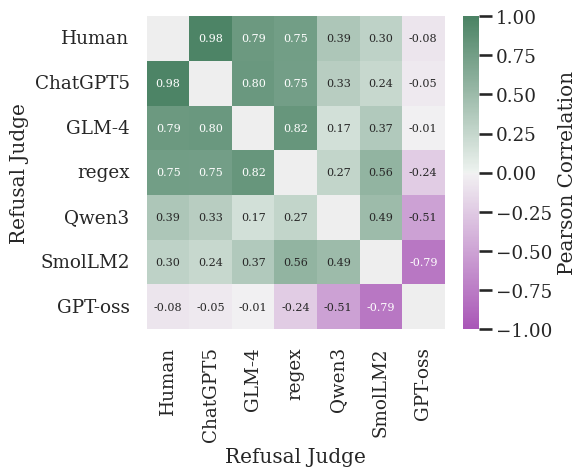

In [7]:

sns.set_theme(
    style="whitegrid",   # adds white grid
    context="talk",      # same as set_context("talk", ...)
    font="serif",
    font_scale=0.8
)
desired_judges = ["Human 1", "ChatGPT5", "GLM-4", "regex", "Qwen3", "SmolLM2", "GPT-oss"]
work = df_10qs[df_10qs["refusal_judge"].isin(desired_judges)].copy()

# Ensure numeric
for c in ["refused", "not_refused", "total"]:
    work[c] = pd.to_numeric(work[c], errors="coerce")

# Build per-judge tables keyed by (model, label)
# Preserve the desired order
present = [j for j in desired_judges if j in set(work["refusal_judge"])]
tables = {}
for j in present:
    sub = work[work["refusal_judge"] == j][["model","label","refused","not_refused"]].copy()
    tables[j] = sub.set_index(["model","label"]).sort_index()

# Pairwise Pearson correlation on stacked counts (refused + not_refused)
n = len(present)
mat = np.full((n, n), np.nan, dtype=float)
for i, ji in enumerate(present):
    di = tables[ji]
    for k, jk in enumerate(present):
        if i == k:
            continue  # leave diagonal as NaN (will render as light grey)
        dj = tables[jk]
        common_idx = di.index.intersection(dj.index)
        if len(common_idx) == 0:
            continue
        vi = pd.concat([di.loc[common_idx, "refused"], di.loc[common_idx, "not_refused"]]).astype(float)
        vj = pd.concat([dj.loc[common_idx, "refused"], dj.loc[common_idx, "not_refused"]]).astype(float)
        mat[i, k] = vi.corr(vj, method="pearson")

# Optional: drop rows/cols entirely NaN off-diagonal
keep_idx = []
for i in range(n):
    off_diag = np.delete(mat[i, :], i)
    if np.isfinite(off_diag).any():
        keep_idx.append(i)

mat = mat[np.ix_(keep_idx, keep_idx)]
labels = [present[i] for i in keep_idx]

# Rename "Human 1" -> "Human" for display only
disp_labels = ["Human" if x == "Human 1" else x for x in labels]

# Plot
os.makedirs("plots", exist_ok=True)
cmap = sns.diverging_palette(300, 145, s=60, as_cmap=True).with_extremes(bad="#eeeeee")
mask = ~np.isfinite(mat)  # NaNs (incl. diagonal) -> light grey

fig_h = 0.5 * len(disp_labels) + 1.5
fig_w = 0.5 * len(disp_labels) + 2.5
plt.figure(figsize=(fig_w, fig_h))
ax = sns.heatmap(
    mat,
    cmap=cmap,
    mask=mask,
    vmin=-1, vmax=1,
    xticklabels=disp_labels,
    yticklabels=disp_labels,
    # annot=True, fmt=".2f", annot_kws={"fontsize":8},
    annot=True, fmt=".2f", annot_kws={"fontsize":8},
    cbar_kws={"label": "Pearson Correlation"},
    square=False
)
ax.set_xlabel("Refusal Judge")
ax.set_ylabel("Refusal Judge")
plt.tight_layout()
plt.savefig("plots/human_vs_selected_judges_pairwise_corr_heatmap.pdf", dpi=300)
plt.show()

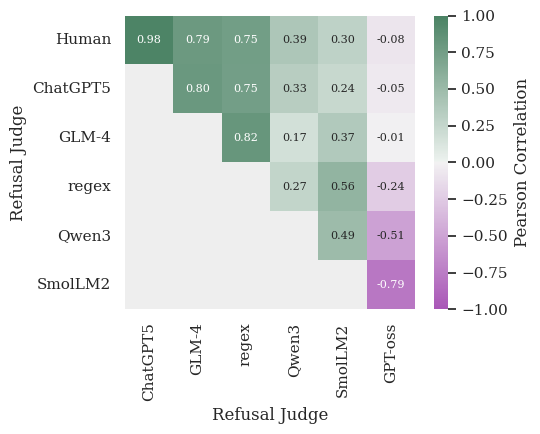

In [8]:
sns.set_theme(font='serif')
# --------------------------------------------------------------------
# Inputs
# --------------------------------------------------------------------
# df_10qs must be a DataFrame with columns:
#   ['model', 'label', 'refusal_judge', 'refused', 'not_refused', 'total']
# If you need to read it from CSV, uncomment the next line:
# df_10qs = pd.read_csv("model_comparison_..._summary.csv")

desired_judges = ["Human 1", "ChatGPT5", "GLM-4", "regex", "Qwen3", "SmolLM2", "GPT-oss"]

# --------------------------------------------------------------------
# Filter to desired judges and ensure numeric
# --------------------------------------------------------------------
work = df_10qs[df_10qs["refusal_judge"].isin(desired_judges)].copy()
for c in ["refused", "not_refused", "total"]:
    work[c] = pd.to_numeric(work[c], errors="coerce")

# --------------------------------------------------------------------
# Build per-judge tables keyed by (model, label)
# --------------------------------------------------------------------
present = [j for j in desired_judges if j in set(work["refusal_judge"])]
tables = {}
for j in present:
    sub = work[work["refusal_judge"] == j][["model", "label", "refused", "not_refused"]].copy()
    tables[j] = sub.set_index(["model", "label"]).sort_index()

# --------------------------------------------------------------------
# Pairwise Pearson correlation on stacked counts (refused + not_refused)
# --------------------------------------------------------------------
n = len(present)
mat = np.full((n, n), np.nan, dtype=float)

for i, ji in enumerate(present):
    di = tables[ji]
    for k, jk in enumerate(present):
        if i == k:
            continue  # diagonal stays NaN
        dj = tables[jk]
        common_idx = di.index.intersection(dj.index)
        if len(common_idx) == 0:
            continue
        vi = pd.concat([di.loc[common_idx, "refused"], di.loc[common_idx, "not_refused"]]).astype(float)
        vj = pd.concat([dj.loc[common_idx, "refused"], dj.loc[common_idx, "not_refused"]]).astype(float)
        mat[i, k] = vi.corr(vj, method="pearson")

# Optionally drop rows/cols with all-NaN off-diagonals
keep_idx = []
for i in range(n):
    off_diag = np.delete(mat[i, :], i)
    if np.isfinite(off_diag).any():
        keep_idx.append(i)

mat = mat[np.ix_(keep_idx, keep_idx)]
labels = [present[i] for i in keep_idx]

# Display names (rename "Human 1" -> "Human" only for plotting)
disp_labels = ["Human" if x == "Human 1" else x for x in labels]

# --------------------------------------------------------------------
# Remove the Human column (x-axis) and the GPT-oss row (y-axis)
# --------------------------------------------------------------------
row_keep = list(range(len(disp_labels)))
col_keep = list(range(len(disp_labels)))

# Remove GPT-oss from rows (y-axis)
if "GPT-oss" in disp_labels:
    row_keep.remove(disp_labels.index("GPT-oss"))

# Remove Human from columns (x-axis)
if "Human" in disp_labels:
    col_keep.remove(disp_labels.index("Human"))

# Subset matrix and labels accordingly
mat = mat[np.ix_(row_keep, col_keep)]
row_labels = [disp_labels[i] for i in row_keep]
col_labels = [disp_labels[j] for j in col_keep]

# --------------------------------------------------------------------
# Plot UPPER-RIGHT triangular heatmap only
# --------------------------------------------------------------------
os.makedirs("plots", exist_ok=True)

# Diverging palette; light grey for NaNs
cmap = sns.diverging_palette(300, 145, s=60, as_cmap=True).with_extremes(bad="#eeeeee")

# Mask NaNs, then hide the LOWER-LEFT triangle (keep diagonal as NaN)
mask_nan = ~np.isfinite(mat)
lower_tri_mask = np.tril(np.ones_like(mat, dtype=bool), k=-1)  # hide below diagonal
mask = mask_nan | lower_tri_mask

fig_h = 0.5 * len(row_labels) + 1.5
fig_w = 0.5 * len(col_labels) + 2.5
plt.figure(figsize=(fig_w, fig_h))

ax = sns.heatmap(
    mat,
    cmap=cmap,
    mask=mask,
    vmin=-1, vmax=1,
    xticklabels=col_labels,
    yticklabels=row_labels,
    annot=True, fmt=".2f", annot_kws={"fontsize": 8},
    cbar_kws={"label": "Pearson Correlation"},
    square=False
)

ax.set_xlabel("Refusal Judge")
ax.set_ylabel("Refusal Judge")
plt.tight_layout()
plt.savefig("plots/paper_human_vs_selected_judges_pairwise_corr_heatmap_diagonal.pdf", dpi=300)
plt.show()


In [9]:
df_all_chatgpt5 = df_all.query("refusal_judge == 'ChatGPT5'")

In [10]:
df_all_chatgpt5

,model,label,refusal_judge,refused,not_refused,total
120,SmolLM2,harmful,ChatGPT5,35,15,50
121,SmolLM2,harmless,ChatGPT5,1,49,50
122,Qwen3,harmful,ChatGPT5,45,5,50
123,Qwen3,harmless,ChatGPT5,0,50,50
124,Raw Data,harmful,ChatGPT5,46,4,50
125,Raw Data,harmless,ChatGPT5,2,48,50
126,Score 0 + Rephrase + Refusals,harmful,ChatGPT5,48,2,50
127,Score 0 + Rephrase + Refusals,harmless,ChatGPT5,1,49,50
128,Score 0 + Rephrase,harmful,ChatGPT5,49,1,50
129,Score 0 + Rephrase,harmless,ChatGPT5,2,48,50


In [11]:
for name in df_all_chatgpt5["model"].unique():
    print(name)

SmolLM2
Qwen3
Raw Data
Score 0 + Rephrase + Refusals
Score 0 + Rephrase
Score 0 + Rephrase + Metatags
Score 0
Safety Oracle
Llama-3.3
SmolLM2-ALB
Qwen3-ALB
Raw Data-ALB
Score 0 + Rephrase + Refusals - ALB
Score 0 + Rephrase -ALB
Score 0 + Rephrase + Metatags -ALB
Score 0 - ALB
Safety Oracle - ALB
Llama-3.3-ALB
GLM-4-ALB
GLM-4


In [23]:
order_models = [
    # SmolLM2
    "SmolLM2",
    "SmolLM2-ALB",

    # Raw Data
    "Raw Data",
    "Raw Data-ALB",  # (conceptually "Raw Data - ALB")

    # Score 0 family
    "Score 0",
    "Score 0 - ALB",
    "Score 0 + Rephrase",
    "Score 0 + Rephrase -ALB",                # (conceptually "... - ALB")
    "Score 0 + Rephrase + Metatags",
    "Score 0 + Rephrase + Metatags -ALB",      # (conceptually "... - ALB")
    "Score 0 + Rephrase + Refusals",
    "Score 0 + Rephrase + Refusals - ALB",
    #"Score 0 + Rephrase + Refusals + Metatags",
    #"Score 0 + Rephrase data + Refusals + Metatags - ALB",
    "Safety Oracle",
    "Safety Oracle - ALB",

    # GLM-4
    "GLM-4",
    "GLM-4-ALB",

    # Llama-3.3
    "Llama-3.3",
    "Llama-3.3-ALB",

    # Qwen3
    "Qwen3",
    "Qwen3-ALB",
]

# Sort by this custom order (anything not listed goes to the end)
df_sorted = (
    df_all_chatgpt5
      .assign(_model_order=pd.Categorical(df_all_chatgpt5["model"],
                                          categories=order_models,
                                          ordered=True))
      .sort_values("_model_order", na_position="last")
      .drop(columns=["_model_order"])
      .reset_index(drop=True)
)

# (Optional) lock the display/plot order going forward
df_sorted["model"] = df_sorted["model"].astype(
    pd.CategoricalDtype(categories=order_models, ordered=True)
)

# (Optional) sanity check: models in the DF that weren’t in the order list
missing = sorted(set(df_all_chatgpt5["model"]) - set(order_models))
if missing:
    print("Models present but not in order_models:", missing)

df_sorted.head()

,model,label,refusal_judge,refused,not_refused,total
0,SmolLM2,harmful,ChatGPT5,35,15,50
1,SmolLM2,harmless,ChatGPT5,1,49,50
2,SmolLM2-ALB,harmful,ChatGPT5,15,35,50
3,SmolLM2-ALB,harmless,ChatGPT5,1,49,50
4,Raw Data,harmful,ChatGPT5,46,4,50


In [24]:
order_models = [
    "SmolLM2",
    "SmolLM2-ALB",    
    "Raw Data",
    "Raw Data-ALB",
    "Score 0",
    "Score 0 - ALB",
    "Score 0 + Rephrase",
    "Score 0 + Rephrase -ALB",
    "Score 0 + Rephrase + Refusals",
    "Score 0 + Rephrase + Refusals - ALB",
    "Score 0 + Rephrase + Metatags",
    "Score 0 + Rephrase + Metatags -ALB",
    "Safety Oracle",
    "Safety Oracle - ALB",
    "GLM-4",
    "GLM-4-ALB",
    "Llama-3.3",
    "Llama-3.3-ALB",    
    "Qwen3",
    "Qwen3-ALB",
]

# 2) conceptual pairs (base, ALB) using those exact names
pairs = [
    ("SmolLM2", "SmolLM2-ALB"),
    ("Raw Data", "Raw Data-ALB"),
    ("Score 0", "Score 0 - ALB"),
    ("Score 0 + Rephrase", "Score 0 + Rephrase -ALB"),
    ("Score 0 + Rephrase + Metatags", "Score 0 + Rephrase + Metatags -ALB"),
    ("Score 0 + Rephrase + Refusals", "Score 0 + Rephrase + Refusals - ALB"),
    # ("Score 0 + Rephrase data + Refusals + Metatags", "Score 0 + Rephrase data + Refusals + Metatags - ALB"),
    ("Safety Oracle", "Safety Oracle - ALB"),
    ("GLM-4", "GLM-4-ALB"),
    ("Llama-3.3", "Llama-3.3-ALB"),
    ("Qwen3", "Qwen3-ALB"),
]

# 3) helper: blend with white (lighten) or black (darken)
def _blend(c1, c2, t: float):
    r1, g1, b1 = to_rgb(c1)
    r2, g2, b2 = to_rgb(c2)
    return to_hex(((1-t)*r1 + t*r2, (1-t)*g1 + t*g2, (1-t)*b1 + t*b2))

def lighten(color, t=0.25):  # t in [0,1], higher = lighter
    return _blend(color, "white", t)

def darken(color, t=0.25):   # t in [0,1], higher = darker
    return _blend(color, "black", t)

# 4) pick 10 distinct base hues (one per pair)
base_hues = sns.color_palette("tab10", n_colors=len(pairs))  # or "husl", "Set2", etc.

# 5) build palette dict: lighter for base model, darker for ALB
palette = {}
for (base, alb), base_color in zip(pairs, base_hues):
    palette[base] = lighten(base_color, t=0.30)  # lighter for non-ALB
    palette[alb]  = darken(base_color,  t=0.25)  # darker for ALB

# 6) if you want a list of colors aligned to your plotting order:
colors_in_order = [palette.get(m, "#cccccc") for m in order_models]

# --- usage examples ---

# (A) seaborn uses dict palette automatically when x variable is 'model'
# sns.barplot(data=df_all_chatgpt5, x="model", y="some_metric", palette=palette)

# (B) or pass explicit list matching your ordered categories
# sns.barplot(data=df_all_chatgpt5, x="model", y="some_metric", palette=colors_in_order)

# optional: check which models had no color (should be none)
missing = sorted(set(order_models) - set(palette.keys()))
print(missing)

[]


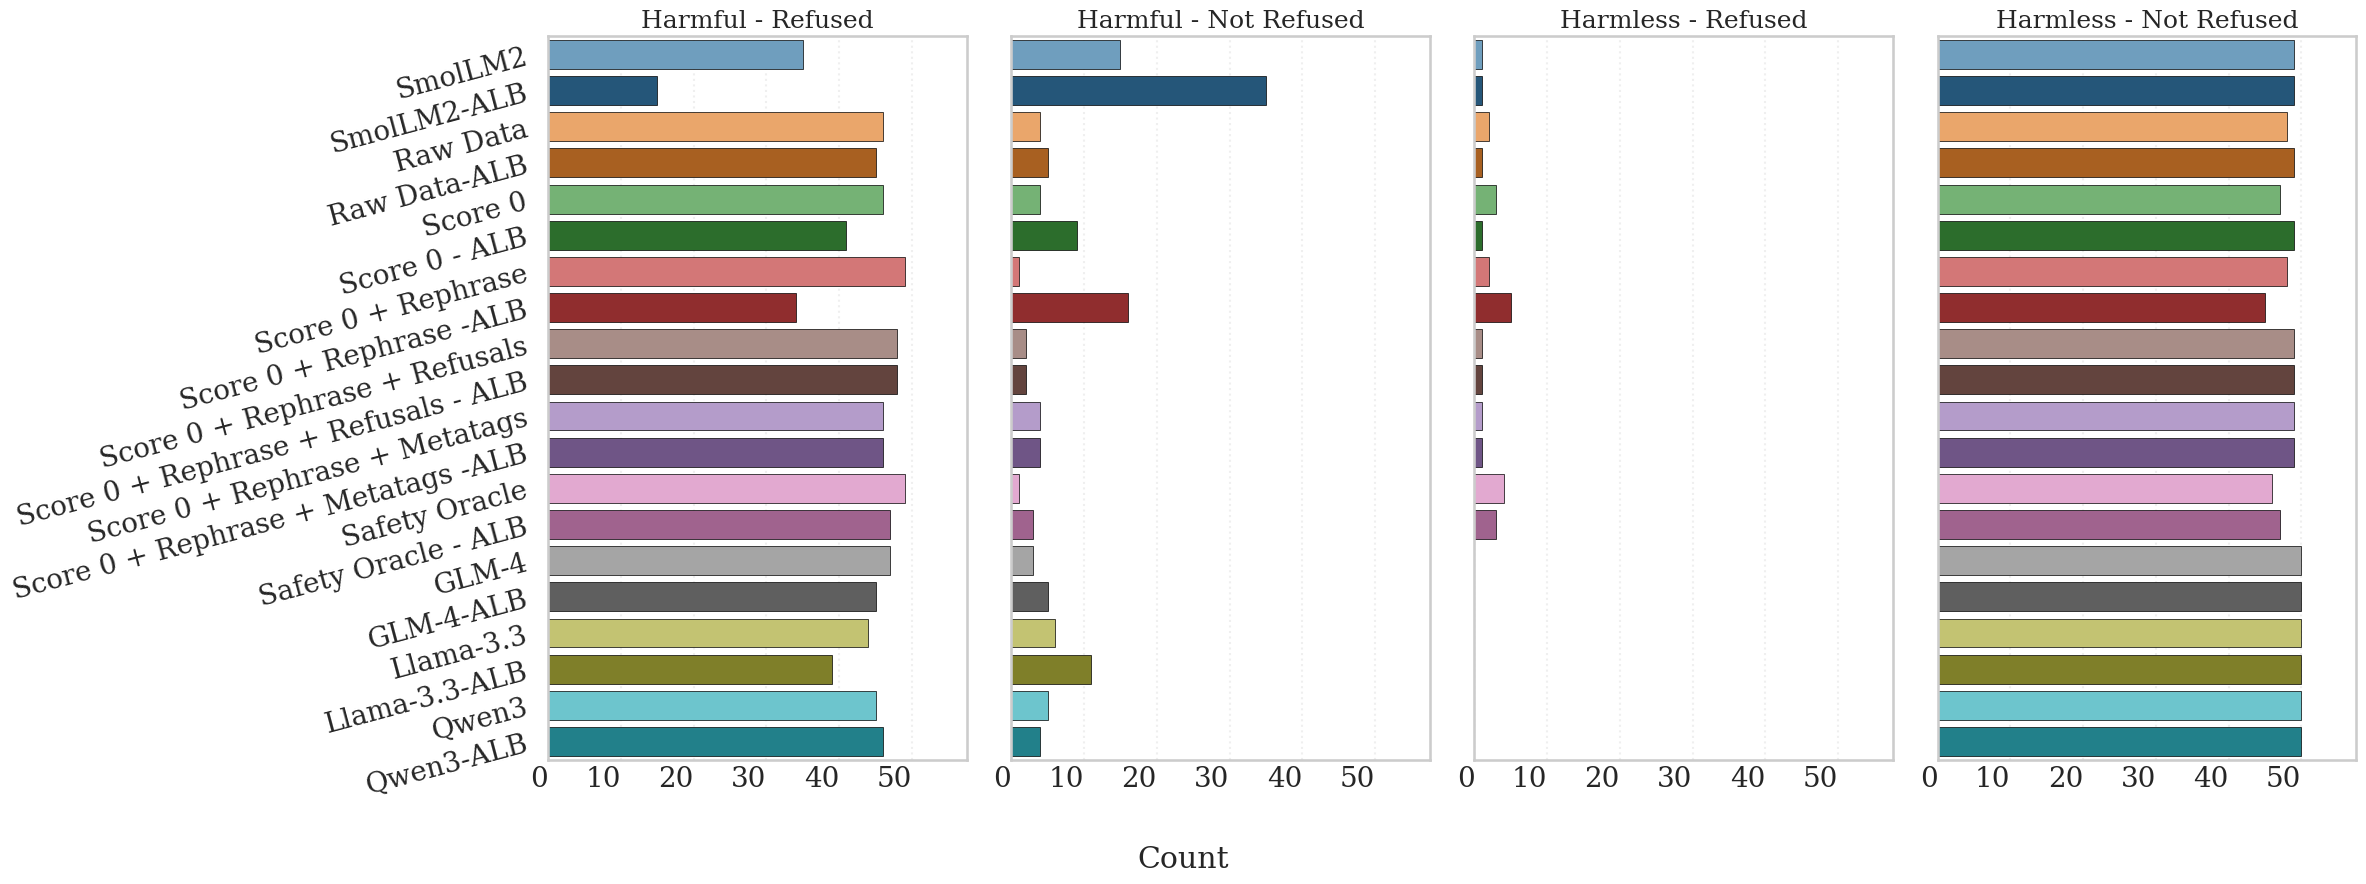

In [27]:

sns.set_theme(
    style="whitegrid",   # adds white grid
    context="talk",      # same as set_context("talk", ...)
    font="serif",
    font_scale=1.0
)
# Expected pre-existing objects:
# - df_sorted: DataFrame with columns ["model","label","refused","not_refused", ...]
# - order_models: list of model names in the exact order you want
# - colors_in_order: list of colors aligned to order_models

# 1) Build palette mapping (model -> color)
palette_map = dict(zip(order_models, colors_in_order))

# 2) Pick the correct "not_refused" column name (in case of hyphen variant)
notref_col = "not_refused" if "not_refused" in df_sorted.columns else "not-refused"

# 3) Ensure 'model' is categorical with your exact order (updated dtype check)
if not isinstance(df_sorted["model"].dtype, CategoricalDtype):
    df_sorted["model"] = df_sorted["model"].astype(
        CategoricalDtype(categories=order_models, ordered=True)
    )
else:
    # already categorical: enforce exact categories + order
    df_sorted["model"] = df_sorted["model"].cat.set_categories(
        order_models, ordered=True
    )

# 4) Helper: horizontal bar panel (fixed seaborn 0.13+ API)
def _barh(ax, data, x_col, title):
    sns.barplot(
        data=data,
        y="model",              # model on Y-axis
        x=x_col,                # counts on X-axis
        order=order_models,
        hue="model",            # drive palette by model to avoid deprecation warning
        hue_order=order_models,
        palette=palette_map,
        errorbar=None,          # replaces deprecated ci=None
        dodge=False,            # hue==y → one bar per model
        ax=ax,
        edgecolor="black",
        linewidth=0.5,
    )
    # Remove legend produced by hue
    leg = ax.get_legend()
    if leg is not None:
        leg.remove()

    #ax.set_title(title, fontsize=11, pad=6)
    ax.set_title(title, pad=6)
    ax.set_xlabel("")  # we'll add a common xlabel to the figure
    ax.set_ylabel("")
    #ax.set_xscale('log')
    ax.tick_params(axis="y", labelsize=20)
    #ax.tick_params(axis="y")
    ax.grid(axis="x", linestyle=":", alpha=0.3)

    for lbl in ax.get_xticklabels():
        lbl.set_fontsize(20)
    for lbl in ax.get_yticklabels():
        lbl.set_fontsize(20)

    for lbl in ax.get_xticklabels():
        lbl.set_rotation(0)
        lbl.set_horizontalalignment('right')
        lbl.set_verticalalignment('center_baseline')
        
    # rotate x-ticks slightly more horizontal than vertical
    for lbl in ax.get_yticklabels():
        lbl.set_rotation(15)
        lbl.set_horizontalalignment('right')
        lbl.set_verticalalignment('center_baseline')

    

# 5) Filter once
harmful  = df_sorted[df_sorted["label"].str.lower() == "harmful"]
harmless = df_sorted[df_sorted["label"].str.lower() == "harmless"]

# 6) Unify X-scale across all four plots for fair comparison
max_x = np.nanmax([
    harmful["refused"].max() if len(harmful) else 0,
    harmful[notref_col].max() if len(harmful) else 0,
    harmless["refused"].max() if len(harmless) else 0,
    harmless[notref_col].max() if len(harmless) else 0,
])
xmax = max_x * 1.15 if np.isfinite(max_x) else None

# 7) Figure & axes — taller to fit many Y labels; sharey lines up rows
# sns.set_style("whitegrid")
fig_h = max(6, 0.45 * len(order_models))  # auto-height by number of models
fig, axes = plt.subplots(1, 4, figsize=(24, fig_h), sharey=True)

_barh(axes[0], harmful,  "refused",     "Harmful - Refused")
_barh(axes[1], harmful,  notref_col,    "Harmful - Not Refused")
_barh(axes[2], harmless, "refused",     "Harmless - Refused")
_barh(axes[3], harmless, notref_col,    "Harmless - Not Refused")

# 8) Apply common X limit
if xmax is not None and np.isfinite(xmax) and xmax > 0:
    for ax in axes:
        ax.set_xlim(0, xmax)

# Common X label
#fig.supxlabel("Count", fontsize=11)
fig.supxlabel("Count")

plt.tight_layout()
plt.savefig("plots/paper_df_chatgpt5_judge_model_comparison_1x4_hbar.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [28]:
df_all

,model,label,refusal_judge,refused,not_refused,total
0,SmolLM2,harmful,regex,31,19,50
1,SmolLM2,harmless,regex,1,49,50
2,Qwen3,harmful,regex,1,49,50
3,Qwen3,harmless,regex,0,50,50
4,Raw Data,harmful,regex,31,19,50
...,...,...,...,...,...,...
475,Llama-3.3-ALB,harmless,GLM-4,0,50,50
476,GLM-4-ALB,harmful,GLM-4,0,50,50
477,GLM-4-ALB,harmless,GLM-4,0,50,50
478,GLM-4,harmful,GLM-4,0,50,50


In [29]:
order_models = [
    # SmolLM2
    "SmolLM2",
    "SmolLM2-ALB",

    # Raw Data
    "Raw Data",
    "Raw Data-ALB",  # (conceptually "Raw Data - ALB")

    # Score 0 family
    "Score 0",
    "Score 0 - ALB",
    "Score 0 + Rephrase",
    "Score 0 + Rephrase -ALB",                # (conceptually "... - ALB")
    "Score 0 + Rephrase + Metatags",
    "Score 0 + Rephrase + Metatags -ALB",      # (conceptually "... - ALB")
    "Score 0 + Rephrase + Refusals",
    "Score 0 + Rephrase + Refusals - ALB",
    "Safety Oracle",
    "Safety Oracle - ALB",

    # GLM-4
    "GLM-4",
    "GLM-4-ALB",

    # Llama-3.3
    "Llama-3.3",
    "Llama-3.3-ALB",

    # Qwen3
    "Qwen3",
    "Qwen3-ALB",
]

# Sort by this custom order (anything not listed goes to the end)
df_all_sorted = (
    df_all
      .assign(_model_order=pd.Categorical(df_all["model"],
                                          categories=order_models,
                                          ordered=True))
      .sort_values("_model_order", na_position="last")
      .drop(columns=["_model_order"])
      .reset_index(drop=True)
)

# (Optional) lock the display/plot order going forward
df_all_sorted["model"] = df_all_sorted["model"].astype(
    pd.CategoricalDtype(categories=order_models, ordered=True)
)


In [30]:

# --- custom orders ---
order_models = [
    "SmolLM2","SmolLM2-ALB",
    "Raw Data","Raw Data-ALB",
    "Score 0","Score 0 - ALB",
    "Score 0 + Rephrase","Score 0 + Rephrase -ALB",
    "Score 0 + Rephrase + Metatags","Score 0 + Rephrase + Metatags -ALB",
    "Score 0 + Rephrase + Refusals","Score 0 + Rephrase + Refusals - ALB",
    "Safety Oracle","Safety Oracle - ALB",
    "GLM-4","GLM-4-ALB",
    "Llama-3.3","Llama-3.3-ALB",
    "Qwen3","Qwen3-ALB",
]

order_judges = [
    "SmolLM2",
    "Raw Data",
    "Score 0",
    "Score 0 + Rephrase",
    "Score 0 + Rephrase + Metatags",
    "Score 0 + Rephrase + Refusals",  # <- normalize typo below
    "Safety Oracle",
    "GLM-4",
    "Qwen3",
    "GPT-oss",
    "regex",
    "ChatGPT5",
]

# --- column name guard for judges ---
judge_col = "refusal_judge" if "refusal_judge" in df_all.columns else "refusal judge"

# --- make a working copy and normalize the one-off typo ---
df_all2 = df_all.copy()
df_all2[judge_col] = df_all2[judge_col].replace(
    {"Score 0 + Rephrase + Refusalsregex": "Score 0 + Rephrase + Refusals"}
)

# --- set categorical orders ---
df_all2["model"] = df_all2["model"].astype(CategoricalDtype(categories=order_models, ordered=True))
df_all2[judge_col] = df_all2[judge_col].astype(CategoricalDtype(categories=order_judges, ordered=True))

# --- sort by model then refusal_judge (both orders respected) ---
df_all_sorted = (
    df_all2
    .sort_values(["model", judge_col], na_position="last")
    .reset_index(drop=True)
)

# (optional) quick sanity checks
missing_models = sorted(set(df_all["model"]) - set(order_models))
missing_judges = sorted(set(df_all[judge_col]) - set(order_judges))
if missing_models:
    print("Models not in order list:", missing_models)
if missing_judges:
    print("Judges not in order list:", missing_judges)


In [31]:
for name in df_all_sorted["refusal_judge"].unique():
    print(name)

SmolLM2
Raw Data
Score 0
Score 0 + Rephrase
Score 0 + Rephrase + Metatags
Score 0 + Rephrase + Refusals
Safety Oracle
GLM-4
Qwen3
GPT-oss
regex
ChatGPT5


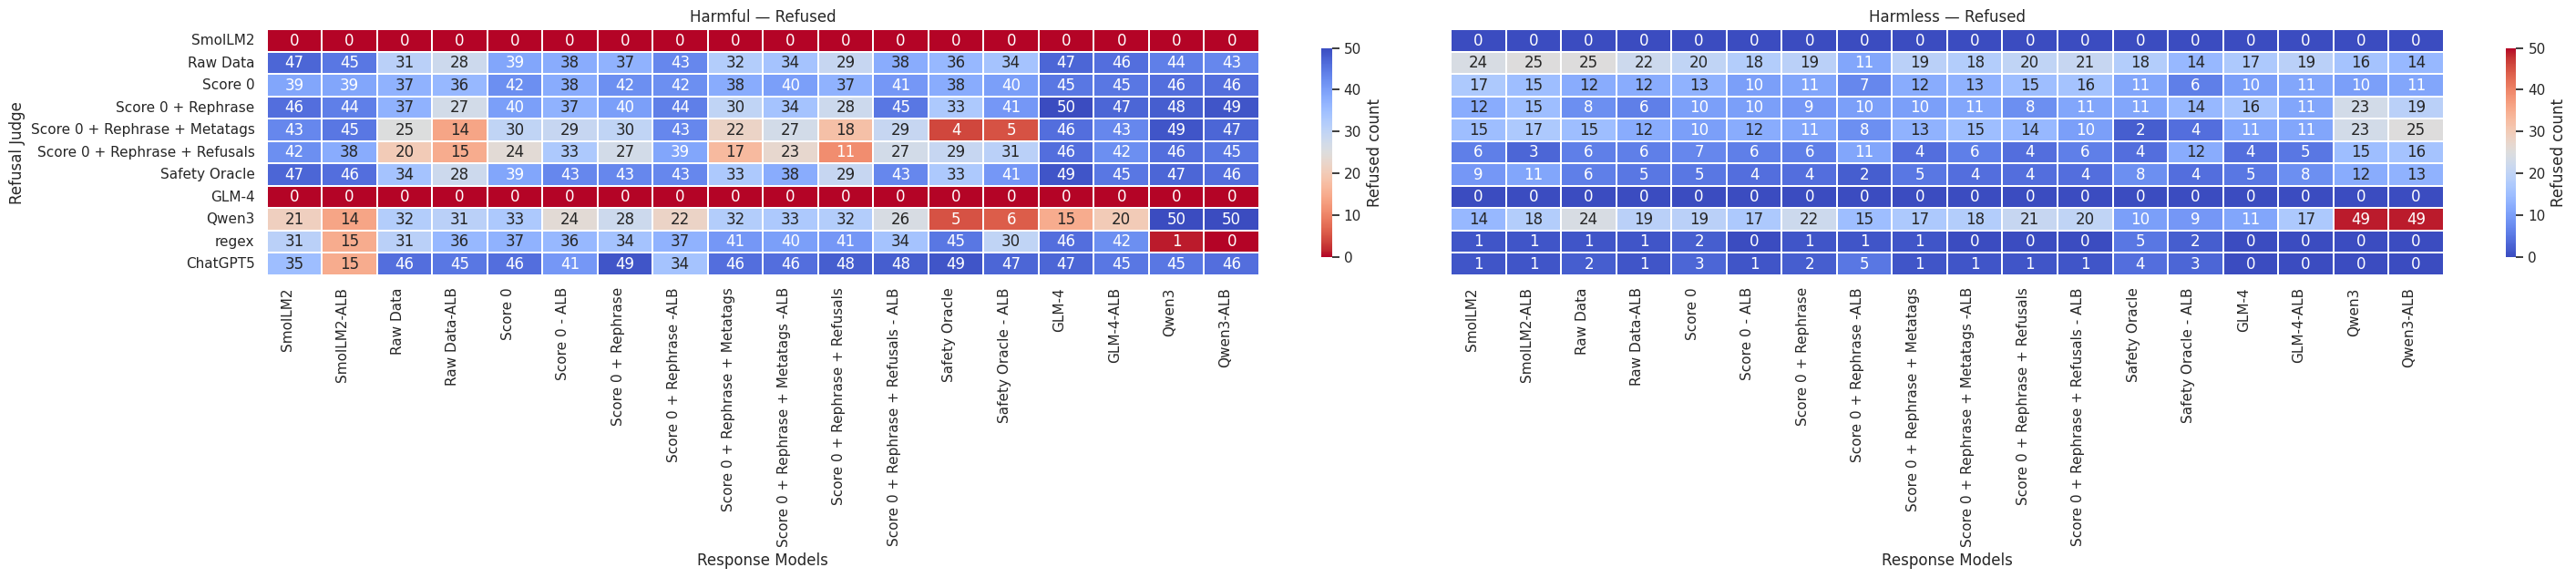

In [37]:

# --- Drop Llama-3.3 / Llama-3.3-ALB models
df_plot = df_all_sorted[~df_all_sorted["model"].isin(["Llama-3.3","Llama-3.3-ALB"])].copy()

# Column guard
judge_col = "refusal_judge" if "refusal_judge" in df_plot.columns else "refusal judge"

# Drop GPT-oss judge
df_plot = df_plot[df_plot[judge_col] != "GPT-oss"].copy()

# Orders after filtering
model_order = list(pd.unique(df_plot["model"]))
judge_order = list(pd.unique(df_plot[judge_col]))
if "ChatGPT5" in judge_order:
    judge_order = [j for j in judge_order if j != "ChatGPT5"] + ["ChatGPT5"]

# Pivots with judges as rows (Y) and models as columns (X)
harmful_pivot = (
    df_plot[df_plot["label"].str.lower()=="harmful"]
    .pivot(index=judge_col, columns="model", values="refused")
    .reindex(index=judge_order, columns=model_order)
    .fillna(0)
)
harmless_pivot = (
    df_plot[df_plot["label"].str.lower()=="harmless"]
    .pivot(index=judge_col, columns="model", values="refused")
    .reindex(index=judge_order, columns=model_order)
    .fillna(0)
)

# Shared color scale
all_vals = np.r_[harmful_pivot.to_numpy().ravel(), harmless_pivot.to_numpy().ravel()]
vmin, vmax = 0.0, float(np.nanmax(all_vals)) if np.isfinite(np.nanmax(all_vals)) else 1.0
center = vmax / 2.0

# Colormaps
cmap_left  = sns.color_palette("coolwarm", as_cmap=True).reversed()
cmap_right = sns.color_palette("coolwarm", as_cmap=True)

# Annotations
harmful_annot  = harmful_pivot.astype(int).to_numpy()
harmless_annot = harmless_pivot.astype(int).to_numpy()

sns.set(style="whitegrid")
os.makedirs("plots", exist_ok=True)

# Wider & shorter figure
fig_w = max(22, 1.1 * len(model_order) + 10)   # wider per #models
fig_h = max(4, 0.5 * len(judge_order) + 1)     # shorter per #judges
fig, axes = plt.subplots(1, 2, figsize=(fig_w, fig_h), sharey=False)

# Left: harmful — refused
ax0 = axes[0]
sns.heatmap(
    harmful_pivot,
    ax=ax0,
    cmap=cmap_left,
    vmin=vmin, vmax=vmax, center=center,
    #annot=harmful_annot, fmt="d", annot_kws={"fontsize":8},
    annot=harmful_annot, fmt="d",
    cbar=True, cbar_kws={"label": "Refused count", "shrink":0.85},
    linewidths=0.3, linecolor="white"
)
# ax0.set_title("Harmful — Refused", fontsize=12)
ax0.set_title("Harmful — Refused")
ax0.set_xlabel("Response Models")
ax0.set_ylabel("Refusal Judge")
# ax0.set_xticklabels(ax0.get_xticklabels(), rotation=60, ha="right", fontsize=9)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")
# ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=10)
ax0.set_yticklabels(ax0.get_yticklabels())

# Right: harmless — refused
ax1 = axes[1]
sns.heatmap(
    harmless_pivot,
    ax=ax1,
    cmap=cmap_right,
    vmin=vmin, vmax=vmax, center=center,
    # annot=harmless_annot, fmt="d", annot_kws={"fontsize":8},
    annot=harmless_annot, fmt="d",
    cbar=True, cbar_kws={"label": "Refused count", "shrink":0.85},
    linewidths=0.3, linecolor="white"
)
# ax1.set_title("Harmless — Refused", fontsize=12)
ax1.set_title("Harmless — Refused")
ax1.set_xlabel("Response Models")
ax1.set_ylabel("")  # no axis label on right

# >>> Show Refusal Judge names only on the LEFT subplot
ax1.set_yticklabels([])           # remove right tick labels
ax1.tick_params(axis="y", length=0)  # hide tick marks on right y-axis

# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha="right", fontsize=9)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.savefig("plots/appendix_df_all_refused_heatmaps_swapped_axes_no_llama_no_gptoss_wider_shorter_leftYonly.pdf", dpi=300)
plt.show()




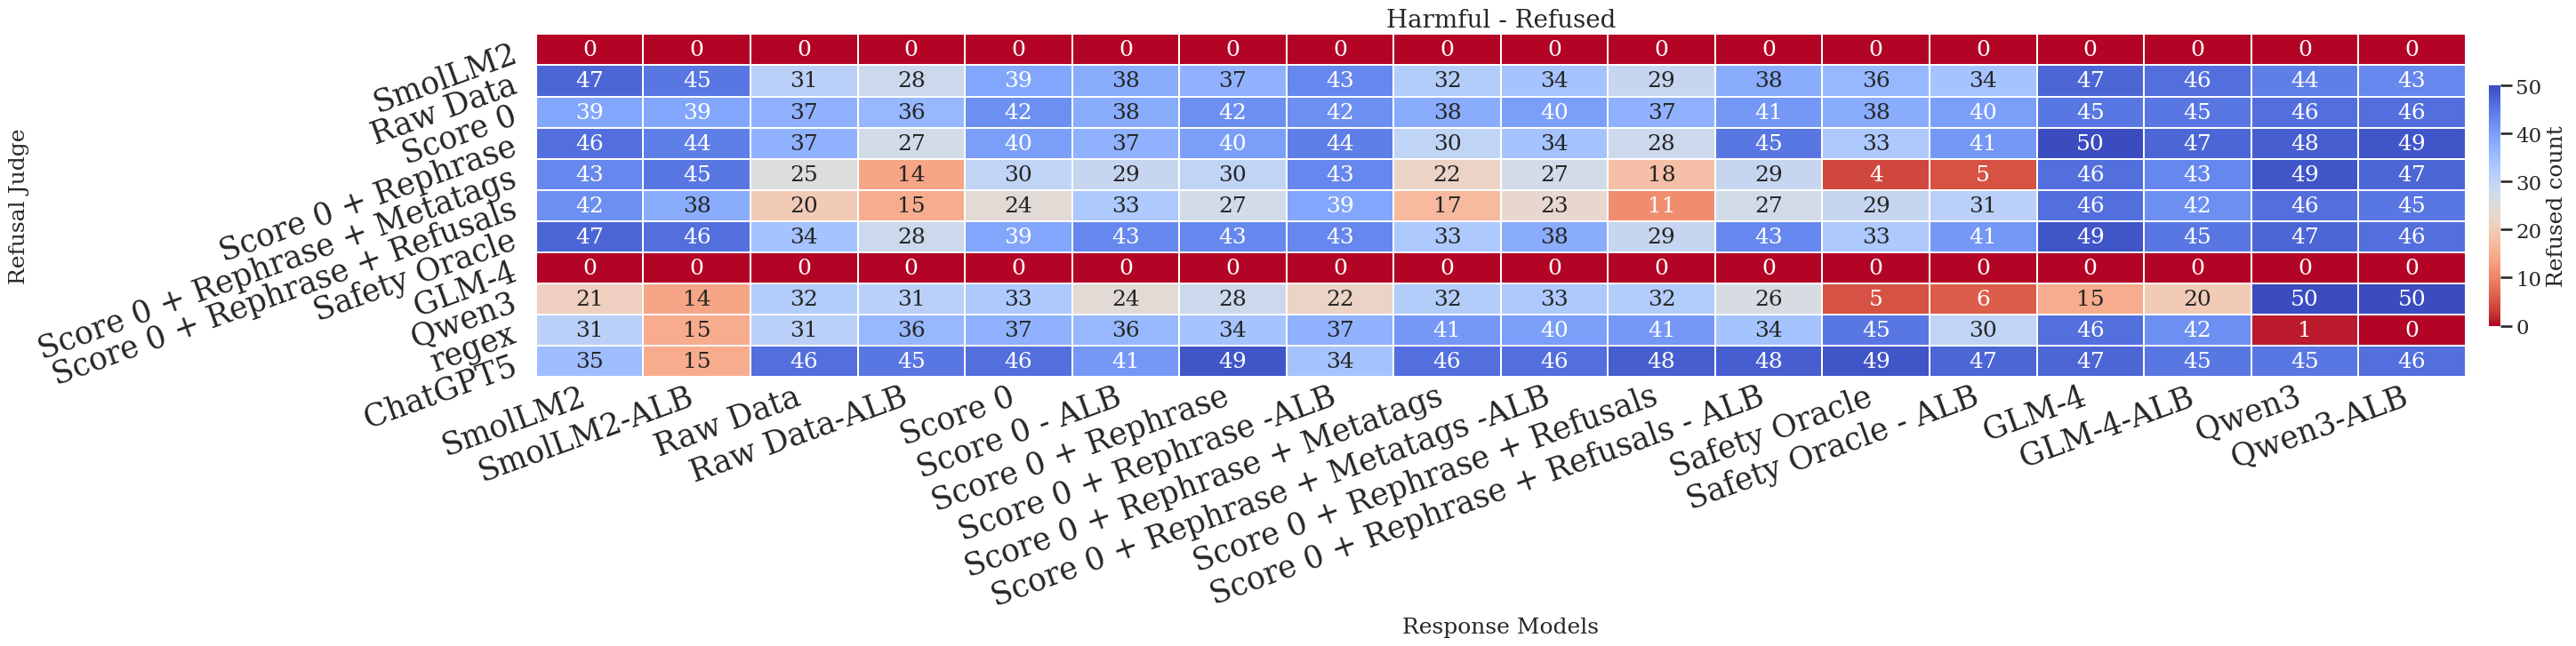

In [35]:

sns.set_theme(
    style="whitegrid",   # adds white grid
    context="talk",      # same as set_context("talk", ...)
    font="serif",
    font_scale=1.0
)
# --- Start from df_all_sorted ---

# 1) filter models
df_plot = df_all_sorted[~df_all_sorted["model"].isin(["Llama-3.3", "Llama-3.3-ALB"])].copy()


# 2) column guard for judge name + drop GPT-oss as judge
judge_col = "refusal_judge" if "refusal_judge" in df_plot.columns else "refusal judge"
df_plot = df_plot[df_plot[judge_col] != "GPT-oss"].copy()



# 3) consistent axis orders (models on X, judges on Y); put ChatGPT5 last
model_order = list(pd.unique(df_plot["model"]))
judge_order = list(pd.unique(df_plot[judge_col]))
if "ChatGPT5" in judge_order:
    judge_order = [j for j in judge_order if j != "ChatGPT5"] + ["ChatGPT5"]

# 4) pivot: judges as rows (Y), models as cols (X) for HARMFUL refused counts
harmful_pivot = (
    df_plot[df_plot["label"].str.lower() == "harmful"]
    .pivot(index=judge_col, columns="model", values="refused")
    .reindex(index=judge_order, columns=model_order)
    .fillna(0)
)

# color scale & cmap
vmin = 0.0
vmax = float(np.nanmax(harmful_pivot.to_numpy())) if np.isfinite(np.nanmax(harmful_pivot.to_numpy())) else 1.0
center = vmax / 2.0
cmap = sns.color_palette("coolwarm", as_cmap=True).reversed()

# annotations
harmful_annot = harmful_pivot.astype(int).to_numpy()

# figure (wider, slightly shorter)
# sns.set(style="whitegrid")
os.makedirs("plots", exist_ok=True)
fig_w = max(24, 1.35 * len(model_order) + 8)
fig_h = max(3.6, 0.42 * len(judge_order) + 3)

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
sns.heatmap(
    harmful_pivot,
    ax=ax,
    cmap=cmap,
    vmin=vmin, vmax=vmax, center=center,
    annot=harmful_annot, fmt="d",
    cbar=True, cbar_kws={"label": "Refused count", "shrink": 0.7, "pad": 0.01},
    linewidths=0.3, linecolor="white"
)
"""
ax.set_title("Harmful - Refused", fontsize=16)
ax.set_xlabel("Response Models", fontsize=16)
ax.set_ylabel("Refusal Judge", fontsize=16)
"""
ax.set_title("Harmful - Refused", fontsize=20)
ax.set_xlabel("Response Models")
ax.set_ylabel("Refusal Judge")

# rotate x-ticks slightly more horizontal than vertical
for lbl in ax.get_xticklabels():
    lbl.set_rotation(20)
    lbl.set_horizontalalignment('right')
    lbl.set_verticalalignment('center_baseline')
    
# rotate x-ticks slightly more horizontal than vertical
for lbl in ax.get_yticklabels():
    lbl.set_rotation(20)
    lbl.set_horizontalalignment('right')
    lbl.set_verticalalignment('center_baseline')

# >>> increase tick label font sizes significantly
# ax.tick_params(axis="x", labelsize=16)
# ax.tick_params(axis="y", labelsize=16)

# also ensure text objects are set (belt-and-suspenders)
#"""
for lbl in ax.get_xticklabels():
    lbl.set_fontsize(25)
for lbl in ax.get_yticklabels():
    lbl.set_fontsize(25)
#"""
# spacing to fit larger labels
plt.tight_layout()
# plt.subplots_adjust(left=0.08, right=0.995, top=0.92, bottom=0.32)

plt.savefig("plots/paper_all_harmful_refused.pdf", dpi=300, bbox_inches="tight")
plt.show()
